<a href="https://colab.research.google.com/github/IshanJain1211/Deep-Learning/blob/main/Neural_Networks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Create a model Class that inherits nn.module
class Model(nn.Module):
  # Input Layer (4 features of the flower) -->
  #Hidden Layer 1 -->
  #H2 -->
  #Output
  def __init__(self, in_features=4, h1=8,h2=9, out_features=3) :
    super().__init__() #Instantiate our nn.Module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)
  def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2(x))
    x= self.out(x)
    return x

In [ ]:
#Pick a ranodm seed for randomization
torch.manual_seed(41)
model=Model()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
#One Hot encoding
my_df['species']=my_df['species'].replace('setosa',0.0)
my_df['species']=my_df['species'].replace('versicolor',1.0)
my_df['species']=my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-38-f4047352dd30>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']=my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#Train Test Split Set X,y
X= my_df.drop('species',axis=1)
y= my_df['species']
X=X.values
y=y.values

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
#Setting the criteria for measuring the eror
criterion=nn.CrossEntropyLoss()
#Choose Adam Optimizer, lr= Learning rate (if eror doesn't go down after a bunch of iterations (epochs) )
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 200
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972
Epoch: 100 and loss: 0.05286576226353645
Epoch: 110 and loss: 0.04508381709456444
Epoch: 120 and loss: 0.03979949280619621
Epoch: 130 and loss: 0.035970740020275116
Epoch: 140 and loss: 0.03293721750378609
Epoch: 150 and loss: 0.03041938506066799
Epoch: 160 and loss: 0.026795217767357826
Epoch: 170 and loss: 0.02338254824280739
Epoch: 180 and loss: 0.020531881600618362
Epoch: 190 and loss: 0.018495969474315643


Text(0.5, 0, 'Epoch')

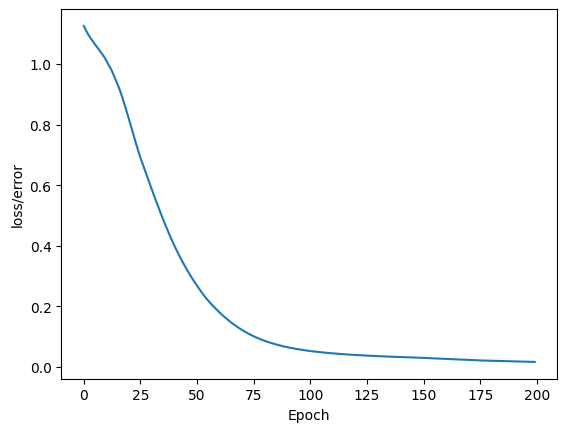

In [ ]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [ ]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [ ]:
loss

tensor(0.1816)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)#Isse columns mein tensors aayenge and the hoghest one shows which is the flower

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i] } \t {y_val.argmax().item()}') #y_test[i] ki jafah directx daal denge to naam print ho jaega

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')#If we change random state to something else we will get different values and they migtht be good or bad

1.)  tensor([-7.1090,  3.8945,  9.0009]) 	 2 	 2
2.)  tensor([-9.7568,  1.8037, 15.7614]) 	 2 	 2
3.)  tensor([-10.9675,   2.8777,  16.6036]) 	 2 	 2
4.)  tensor([-3.7644,  8.0391, -1.2691]) 	 1 	 1
5.)  tensor([-9.0332,  3.5238, 12.6383]) 	 2 	 2
6.)  tensor([-1.8244,  8.6935, -5.3425]) 	 1 	 1
7.)  tensor([-6.8734,  4.9821,  7.3703]) 	 2 	 2
8.)  tensor([-3.6489,  8.2259, -1.6743]) 	 1 	 1
9.)  tensor([-7.9281,  4.2588,  9.9576]) 	 2 	 2
10.)  tensor([-10.4298,   1.8741,  16.8126]) 	 2 	 2
11.)  tensor([-6.4726,  5.1594,  6.5086]) 	 2 	 2
12.)  tensor([ 12.4419,   2.4570, -21.9049]) 	 0 	 0
13.)  tensor([ 11.4217,   2.2044, -19.9136]) 	 0 	 0
14.)  tensor([-0.1940,  6.9626, -6.0924]) 	 1 	 1
15.)  tensor([ 10.1568,   3.3059, -19.1088]) 	 0 	 0
16.)  tensor([-5.9767,  5.7989,  4.9675]) 	 2 	 1
17.)  tensor([ 11.2091,   2.5254, -19.9652]) 	 0 	 0
18.)  tensor([-6.8898,  4.2924,  8.1948]) 	 1 	 2
19.)  tensor([ 12.0366,   2.3664, -21.1260]) 	 0 	 0
20.)  tensor([  9.6811,   2.7818, -17.

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


with torch.no_grad():
  print(model(new_iris))


tensor([ 12.1670,   2.2441, -21.1874])


In [ ]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])


with torch.no_grad():
  print(model(newer_iris))

tensor([-7.2820,  3.8641,  9.3350])


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'my_first_iris_model.pt')#Isse mere model ki saare biases and weights save ho gye

In [ ]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_iris_model.pt')) #isse hum vapis us hi model ke wieghts and bises naye model mein daal skte hain

<ipython-input-54-b6c121101e92>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_iris_model.pt'))


<All keys matched successfully>

In [ ]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)